## Train Deep Learning Model

### step-1 load the preprocess data

In [1]:
import os
import numpy as np
import cv2
import gc

In [2]:
# load the preprocessed data
data = np.load('./data/data_preprocess.npz')

In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
X.shape, y.shape

((9959, 100, 100, 3), (9959,))

### Preprocessing "y"

In [5]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [8]:
y_array = y_onehot.toarray()

### Split the Data into Train and Test sets

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_array,test_size=0.2,random_state=42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

### Deep Learning Model

![cnn](cnn.png)

In [11]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [14]:
cv2.imshow('a',x_train[-2])
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [16]:
# convolution neural network

model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])


# compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [18]:
# Training CNN
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=20)

Epoch 1/20
266/266 [==============================] - 87s 315ms/step - loss: 0.5018 - accuracy: 0.7849 - val_loss: 0.0757 - val_accuracy: 0.9749
Epoch 2/20
266/266 [==============================] - 43s 160ms/step - loss: 0.0662 - accuracy: 0.9768 - val_loss: 0.0609 - val_accuracy: 0.9794
Epoch 3/20
266/266 [==============================] - 45s 169ms/step - loss: 0.0416 - accuracy: 0.9859 - val_loss: 0.0388 - val_accuracy: 0.9859
Epoch 4/20
266/266 [==============================] - 50s 189ms/step - loss: 0.0213 - accuracy: 0.9928 - val_loss: 0.0486 - val_accuracy: 0.9859
Epoch 5/20
266/266 [==============================] - 60s 227ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0598 - val_accuracy: 0.9809
Epoch 6/20
266/266 [==============================] - 69s 259ms/step - loss: 0.0114 - accuracy: 0.9951 - val_loss: 0.0402 - val_accuracy: 0.9900
Epoch 7/20
266/266 [==============================] - 68s 255ms/step - loss: 0.0080 - accuracy: 0.9964 - val_loss: 0.0700 - val_ac

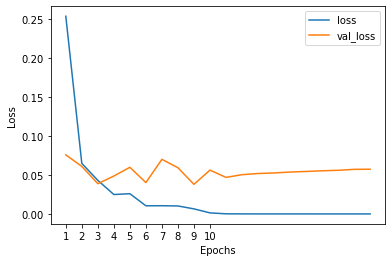

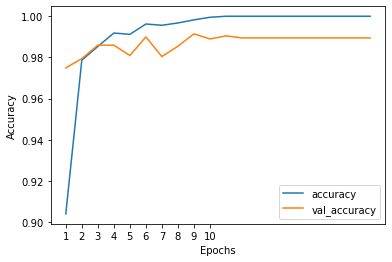

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

history_df

history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()



In [20]:

# Save CNN Model
model.save('face_cnn_model')


INFO:tensorflow:Assets written to: face_cnn_model\assets


In [21]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]